In [ ]:
!pip install keras==2.0.6

In [ ]:
pip install tensorflow==1.13.2

In [2]:
!wget --header="Host: doc-1g-7o-drive-data-export.googleusercontent.com" --header="User-Agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.111 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9,so;q=0.8" --header="Cookie: AUTH_7ismh8c5k5t2emov6b0lnms8vhh365nj_nonce=ifqvit7ugc28g" --header="Connection: keep-alive" "https://doc-1g-7o-drive-data-export.googleusercontent.com/download/m1c8klmadhnkg5pme7a98mn67c86k7d3/meepf86ugnng7sbqj56go1gre3is7ite/1609317000000/aef1695a-663d-4cb7-90c3-e521e86fa7af/106986780830876159455/ADt3v-NlguI7iGpECcycBDgn30V-H-S4yhxrUu8IbBIQHQP1fycKqOOhLbT8aFhF6dF-ggl49o4PZBQvehRHc1F2kEuvm1nZPJmF7ejEvwTUK6CN5oSo34hHm1zWMS2UA6bdLsYPS_SQdsNedn1f_NJAucdPxzQCvo04Cn4uQdE06t-IgyIMks4HZMtPRCXXIPtHy_52vE1LLzhR_RIA2qXhqslHa70ftZsy1XB3KttKxiNjI447qWjAQzi47SaAxTxUlHw6ELLRhmnbO1qbC1HVfTgZIRGTcD_5r_8W-BH1KTcg1vp5YfyLztllHX_0Xe0RLg-VpayL?authuser=0&nonce=ifqvit7ugc28g&user=106986780830876159455&hash=rlg07fa6id5hu2r3pndo8gf97din6fn7" -c -O 'recordings-20201230T092742Z-001.zip'

--2020-12-30 09:31:03--  https://doc-1g-7o-drive-data-export.googleusercontent.com/download/m1c8klmadhnkg5pme7a98mn67c86k7d3/meepf86ugnng7sbqj56go1gre3is7ite/1609317000000/aef1695a-663d-4cb7-90c3-e521e86fa7af/106986780830876159455/ADt3v-NlguI7iGpECcycBDgn30V-H-S4yhxrUu8IbBIQHQP1fycKqOOhLbT8aFhF6dF-ggl49o4PZBQvehRHc1F2kEuvm1nZPJmF7ejEvwTUK6CN5oSo34hHm1zWMS2UA6bdLsYPS_SQdsNedn1f_NJAucdPxzQCvo04Cn4uQdE06t-IgyIMks4HZMtPRCXXIPtHy_52vE1LLzhR_RIA2qXhqslHa70ftZsy1XB3KttKxiNjI447qWjAQzi47SaAxTxUlHw6ELLRhmnbO1qbC1HVfTgZIRGTcD_5r_8W-BH1KTcg1vp5YfyLztllHX_0Xe0RLg-VpayL?authuser=0&nonce=ifqvit7ugc28g&user=106986780830876159455&hash=rlg07fa6id5hu2r3pndo8gf97din6fn7
Resolving doc-1g-7o-drive-data-export.googleusercontent.com (doc-1g-7o-drive-data-export.googleusercontent.com)... 172.217.9.193, 2607:f8b0:4004:806::2001
Connecting to doc-1g-7o-drive-data-export.googleusercontent.com (doc-1g-7o-drive-data-export.googleusercontent.com)|172.217.9.193|:443... connected.
HTTP request sent, awaiting response

In [3]:
!mkdir recordings
!unzip recordings.zip

In [3]:
import numpy as np
import pandas as pd
import librosa
import os
img_folder_path = 'recordings/'
dirListing = os.listdir(img_folder_path)
all_files = []
count=0

In [4]:
for files in dirListing:
  all_files.append('recordings/' + files)

In [5]:
def grader_files():
  temp = len(all_files)==2000
  temp1 = all([x[-3:]=="wav" for x in all_files])
  temp = temp and temp1
  return temp
grader_files()

True

In [6]:
df_audio = pd.DataFrame(columns = ['path', 'label']) 
for item in all_files:
  path = item
  label = item.split('_')[0]
  label = label.split('/')[1]
  df_audio=df_audio.append({'path':path,'label':label},ignore_index=True)

In [7]:
def grader_df():  
  flag_shape = df_audio.shape==(2000,2)
  flag_columns = all(df_audio.columns==['path', 'label'])
  list_values = list(df_audio.label.value_counts())
  flag_label = len(list_values)==10
  flag_label2 = all([i==200 for i in list_values])
  final_flag = flag_shape and flag_columns and flag_label and flag_label2
  return final_flag
grader_df()

True

In [8]:
from sklearn.utils import shuffle
df_audio = shuffle(df_audio, random_state=33)

from sklearn.model_selection import train_test_split
y = df_audio['label']
df_audio = df_audio.drop(['label'],axis=1)
X = df_audio


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y, random_state=45)

In [9]:
def grader_split():  
  flag_len = (len(X_train)==1400) and (len(X_test)==600) and (len(y_train)==1400) and (len(y_test)==600)
  values_ytrain = list(y_train.value_counts())
  flag_ytrain = (len(values_ytrain)==10) and (all([i==140 for i in values_ytrain]))
  values_ytest = list(y_test.value_counts())
  flag_ytest = (len(values_ytest)==10) and (all([i==60 for i in values_ytest]))
  final_flag = flag_len and flag_ytrain and flag_ytest
  return final_flag
grader_split()

True

In [10]:
sample_rate = 22050
def load_wav(x, get_duration=True):
  samples, sample_rate = librosa.load(x, sr=22050)
  if get_duration:
    duration = librosa.get_duration(samples, sample_rate)
    return [samples, duration]
  else:
    return samples

X_train_new = X_train['path']
X_test_new = X_test['path']

X_train_processed = pd.DataFrame(columns = ['raw_data', 'duration'])
X_test_processed = pd.DataFrame(columns=['raw_data','duration'])

In [11]:
from tqdm.notebook import tqdm
for i in tqdm(range(0,len(X_train_new))):  
  samples,duration= load_wav(X_train_new.iloc[i])
  X_train_processed = X_train_processed.append({'raw_data':samples,'duration':duration},ignore_index=True)

In [12]:
for i in tqdm(range(0,len(X_test_new))):
  samples,duration = load_wav(X_test_new.iloc[i])
  X_test_processed = X_test_processed.append({'raw_data':samples,'duration':duration},ignore_index=True)

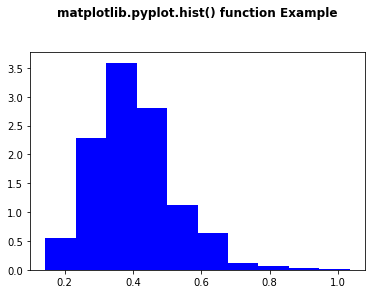

In [13]:
import matplotlib.pyplot as plt
x = X_train_processed['duration']
n_bins = 10
plt.hist(x, n_bins, density = True,  
         histtype ='bar', 
         color = 'blue') 
plt.title('matplotlib.pyplot.hist() function Example\n\n', 
          fontweight ="bold") 
plt.show()


In [14]:
for i in range(0,110,10):
  print(str(i)+"th percentile is " + str(np.percentile(X_train_processed['duration'],i)))

for i in range(90,101):
  print(str(i)+"th percentile is " + str(np.percentile(X_train_processed['duration'],i)))

0th percentile is 0.1435374149659864
10th percentile is 0.26312018140589566
20th percentile is 0.30201360544217687
30th percentile is 0.33503854875283445
40th percentile is 0.36117913832199544
50th percentile is 0.3920181405895692
60th percentile is 0.418639455782313
70th percentile is 0.44988662131519275
80th percentile is 0.4877551020408163
90th percentile is 0.5581768707482995
100th percentile is 1.0351473922902494
90th percentile is 0.5581768707482995
91th percentile is 0.5739142857142857
92th percentile is 0.581734240362812
93th percentile is 0.5978285714285716
94th percentile is 0.6112843537414965
95th percentile is 0.6230385487528345
96th percentile is 0.6365133786848072
97th percentile is 0.6528367346938775
98th percentile is 0.6744253968253967
99th percentile is 0.7655383219954647
100th percentile is 1.0351473922902494


In [15]:
def grader_processed():
  flag_columns = (all(X_train_processed.columns==['raw_data', 'duration'])) and (all(X_test_processed.columns==['raw_data', 'duration']))
  flag_shape = (X_train_processed.shape ==(1400, 2)) and (X_test_processed.shape==(600,2))
  return flag_columns and flag_shape
grader_processed()

True

In [16]:
max_length  = 17640
X_raw_train= X_train_processed['raw_data']
X_raw_test = X_test_processed['raw_data']

X_train_pad_seq = np.zeros((len(X_raw_train),max_length))
X_train_mask = np.zeros((len(X_raw_train),max_length))

X_test_pad_seq = np.zeros((len(X_raw_test),max_length))
X_test_mask = np.zeros((len(X_raw_test),max_length))

In [17]:
index=0
for data in X_raw_train:
  length = len(data)
  if (length < max_length):
    X_train_mask[index][:length] = 1
    X_train_pad_seq[index][:length] = data
  
  else:
    X_train_mask[index][:max_length] = 1
    X_train_pad_seq[index][:max_length] = data[:max_length]

  index = index + 1

index=0
for data in X_raw_test:
  length = len(data)
  if (length < max_length):
    X_test_mask[index][:length] = bool(1)
    X_test_pad_seq[index][:length] = data
  
  else:
    X_test_mask[index][:max_length] = bool(1)
    X_test_pad_seq[index][:max_length] = data[:max_length]

  index = index + 1

In [18]:
X_train_mask = X_train_mask.astype(bool)
print(X_train_mask.dtype)
X_test_mask = X_test_mask.astype(bool)
print(X_test_mask.dtype)

bool
bool


In [19]:
print(type(X_train_mask))
print(X_train_pad_seq.shape)
print(X_test_mask.shape)
print(X_test_pad_seq.shape)

<class 'numpy.ndarray'>
(1400, 17640)
(600, 17640)
(600, 17640)


In [20]:
def grader_padoutput():      
  flag_padshape = (X_train_pad_seq.shape==(1400, 17640)) and (X_test_pad_seq.shape==(600, 17640)) and (y_train.shape==(1400,))
  flag_maskshape = (X_train_mask.shape==(1400, 17640)) and (X_test_mask.shape==(600, 17640)) and (y_test.shape==(600,))
  flag_dtype = (X_train_mask.dtype==bool) and (X_test_mask.dtype==bool)
  #print(flag_padshape,flag_maskshape,flag_dtype)
  return flag_padshape and flag_maskshape and flag_dtype
grader_padoutput()

True

model 1

In [ ]:
%load_ext tensorboard

In [22]:
import tensorflow as tf

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

In [23]:
input = tf.keras.Input(shape=(X_train_pad_seq.shape[1],1))
masking = tf.keras.layers.Masking(mask_value=0)(input)
x1 = tf.keras.layers.LSTM(25)(masking)
x3 = tf.keras.layers.Flatten()(x1)
x2 = tf.keras.layers.Dense(50, activation='relu',kernel_initializer='glorot_normal')(x3)
output =tf.keras.layers.Dense(10, activation='softmax')(x2)



model_1 = tf.keras.Model(inputs=input, outputs=output)

model_1.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 17640, 1)          0         
_________________________________________________________________
masking (Masking)            (None, 17640, 1)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 25)                2700      
_________________________________________________________________
flatten (Flatten)            (None, 25)                0         
_________________________________________________________________
dense (Dense)                (None, 50)                1300      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                510       
Total params: 4,510
Trainable params: 4,510
Non-trainable params: 0
__

In [24]:
X_train_pad_seq = np.reshape(X_train_pad_seq, (X_train_pad_seq.shape[0], X_train_pad_seq.shape[1],1))
X_test_pad_seq = np.reshape(X_test_pad_seq, (X_test_pad_seq.shape[0],X_test_pad_seq.shape[1],1))

In [25]:
X_test_pad_seq.shape

(600, 17640, 1)

In [26]:
from tensorflow import keras
from tensorflow.keras.callbacks import ReduceLROnPlateau
import datetime

DynamicLR = ReduceLROnPlateau(monitor='val_acc', factor=0.9, patience=1, verbose=1, mode='max', cooldown=0, min_lr=0.00001)
adam = tf.keras.optimizers.Adam(0.001)

log_dir= "logs/model1/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir,histogram_freq=1, write_graph=True,write_grads=True)

model_1.compile(optimizer=adam,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [27]:
history=model_1.fit([X_train_pad_seq,X_train_mask],y_train,batch_size=128,epochs=6,validation_data=([X_test_pad_seq,X_test_mask],y_test),callbacks = [tensorboard_callback,DynamicLR])

Train on 1400 samples, validate on 600 samples
Epoch 1/6
1400/1400 [==============================] - 264s 188ms/sample - loss: 2.3032 - acc: 0.0857 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 2/6
1280/1400 [==========================>...] - ETA: 12s - loss: 2.3028 - acc: 0.1023
Epoch 00002: ReduceLROnPlateau reducing learning rate to 0.0009000000427477062.
1400/1400 [==============================] - 267s 190ms/sample - loss: 2.3028 - acc: 0.1000 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 3/6
1280/1400 [==========================>...] - ETA: 12s - loss: 2.3027 - acc: 0.1000
Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0008100000384729356.
1400/1400 [==============================] - 266s 190ms/sample - loss: 2.3027 - acc: 0.1043 - val_loss: 2.3026 - val_acc: 0.0967
Epoch 4/6
1400/1400 [==============================] - 267s 191ms/sample - loss: 2.3027 - acc: 0.1007 - val_loss: 2.3026 - val_acc: 0.1017
Epoch 5/6
1280/1400 [==========================>...] - ETA: 12s - loss:

Using TensorFlow backend.


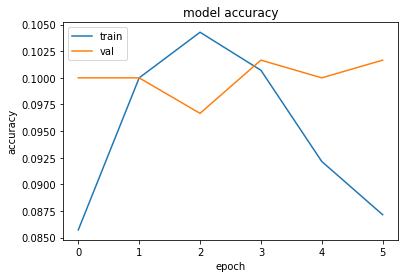

In [28]:
import keras
from matplotlib import pyplot as plt
#history = model1.fit(train_x, train_y,validation_split = 0.1, epochs=50, batch_size=4)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

We see here that the model is not at all performing well. The model seems to be sufferng from underfitting.

MODEL 2

In [35]:
def convert_to_spectrogram(raw_data):  
  spectrum = librosa.feature.melspectrogram(y=raw_data, sr=sample_rate, n_mels=64)
  logmel_spectrum = librosa.power_to_db(S=spectrum, ref=np.max)
  return logmel_spectrum  

In [36]:
X_train_spectrogram = np.zeros((len(X_train_pad_seq),64,35))
X_test_spectrogram = np.zeros((len(X_test_pad_seq),64,35))

In [37]:
len(X_train_pad_seq)

1400

In [38]:
for i in tqdm(range(0,len(X_train_pad_seq))):
  xx = np.array(X_train_pad_seq[i])
  xx = xx.reshape(17640)
  X_train_spectrogram[i] = convert_to_spectrogram(xx)

In [39]:
for i in tqdm(range(0,len(X_test_pad_seq))):
  xx = np.array(X_test_pad_seq[i])
  xx = xx.reshape(17640)
  X_test_spectrogram[i] = convert_to_spectrogram(xx)

In [40]:
def grader_spectrogram():
  flag_shape = (X_train_spectrogram.shape==(1400,64, 35)) and (X_test_spectrogram.shape == (600, 64, 35))
  return flag_shape
grader_spectrogram()

True

In [42]:
input = tf.keras.Input(shape=(64,35))
x1 = tf.keras.layers.LSTM(65,return_sequences='True')(input)
avg = tf.keras.layers.GlobalAveragePooling1D()(x1)
x2 = tf.keras.layers.Dense(140, activation='relu',kernel_initializer='glorot_uniform')(avg)
x3 = tf.keras.layers.Dense(70, activation='relu',kernel_initializer='glorot_uniform')(x2)
x4 = tf.keras.layers.Dense(35, activation='relu',kernel_initializer='glorot_uniform')(x3)
x5 = tf.keras.layers.Dense(16, activation='relu',kernel_initializer='glorot_uniform')(x4)



output =tf.keras.layers.Dense(10, activation='softmax')(x5)
model_2 = tf.keras.Model(inputs=input, outputs=output)

model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 64, 35)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 64, 65)            26260     
_________________________________________________________________
global_average_pooling1d (Gl (None, 65)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 140)               9240      
_________________________________________________________________
dense_3 (Dense)              (None, 70)                9870      
_________________________________________________________________
dense_4 (Dense)              (None, 35)                2485      
_________________________________________________________________
dense_5 (Dense)              (None, 16)                576       
__________

In [43]:
DynamicLR = ReduceLROnPlateau(monitor='val_acc', factor=0.90, patience=1, verbose=1, mode='max', cooldown=0, min_lr=0.0001)
adam = tf.keras.optimizers.Adam(0.001)
model_2.compile(optimizer=adam,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [44]:
history2 = model_2.fit(X_train_spectrogram,y_train,batch_size=100,epochs=25,steps_per_epoch=10,validation_data=(X_test_spectrogram,y_test),callbacks = [DynamicLR])

Instructions for updating:
Use tf.cast instead.
Epoch 1/25
10/10 [==============================] - 9s 851ms/step - loss: 2.2741 - acc: 0.1474 - val_loss: 2.2346 - val_acc: 0.2083
Epoch 2/25
10/10 [==============================] - 8s 761ms/step - loss: 2.1892 - acc: 0.2253 - val_loss: 2.1245 - val_acc: 0.2800
Epoch 3/25
10/10 [==============================] - 8s 775ms/step - loss: 2.0558 - acc: 0.3019 - val_loss: 1.9708 - val_acc: 0.3067
Epoch 4/25
10/10 [==============================] - 8s 777ms/step - loss: 1.8788 - acc: 0.3451 - val_loss: 1.7766 - val_acc: 0.3467
Epoch 5/25
10/10 [==============================] - 8s 762ms/step - loss: 1.6829 - acc: 0.3921 - val_loss: 1.6021 - val_acc: 0.4217
Epoch 6/25
10/10 [==============================] - 8s 766ms/step - loss: 1.4915 - acc: 0.4827 - val_loss: 1.4427 - val_acc: 0.5000
Epoch 7/25
10/10 [==============================] - 8s 754ms/step - loss: 1.3206 - acc: 0.5660 - val_loss: 1.3099 - val_acc: 0.5683
Epoch 8/25
10/10 [==========

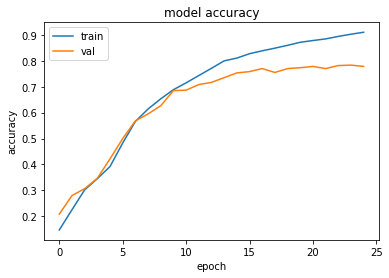

In [45]:
import keras
from matplotlib import pyplot as plt
plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In comparison to the previous model, this one perform quite well. But as it is evident from the graph itself the model after 15 epochs starts to overfit i.e. the gap between training error and test error increases.